In [1]:
%load_ext autoreload
%autoreload complete

In [2]:
import numpy as np
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import data_accessor as acc
datas = [
    'temperature_230509_discrete',
    'pressure_230516_discrete'
    ]
data_dictionary = acc.setup(datas)

loading temperature_230509_discrete__________________________
	input shape (number, dimension): (6000, 10000)
	label shape (number, dimension): (6000, 1)
	there are 16 folds
	4200 for training, 600 for validating, 1200 for testing
loading pressure_230516_discrete__________________________
	input shape (number, dimension): (5000, 10000)
	label shape (number, dimension): (5000, 1)
	there are 16 folds
	3500 for training, 500 for validating, 1000 for testing


__________CROSS VALIDATION__________
Cross-validation rounds: 16
Epochs: 1000
Datas to learn: 
	0: pressure_230516_discrete
	1: temperature_230509_discrete
🧵MULTI TASK, Interweave____________________________
we're learning: multiple tasks
given [1, 2, 3], [a, b, c]: learn [1, a, 2, b, 3, c], simple handling of different counts
>round 0
EARLY STOPPING @ epoch 21
min train loss: 0.01452766746775178
min valid loss: 0.010349297999507852


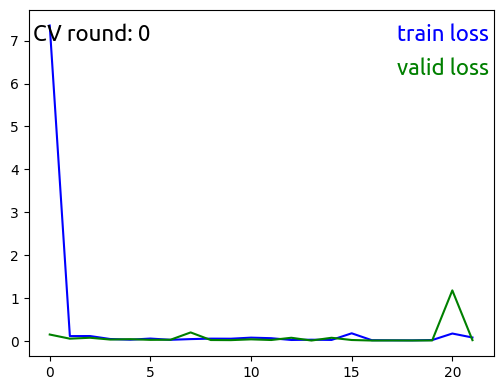

>round 1
EARLY STOPPING @ epoch 14
min train loss: 0.015382742012797062
min valid loss: 0.013333522766414616


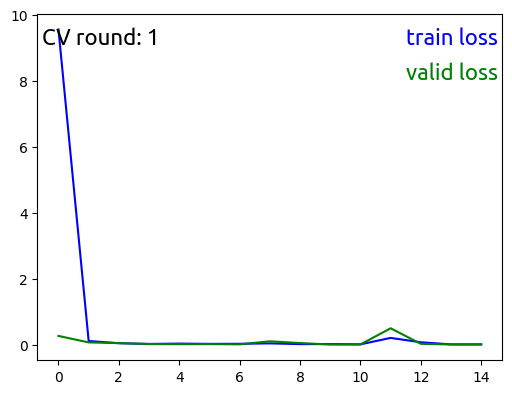

>round 2
EARLY STOPPING @ epoch 15
min train loss: 0.014079596177667133
min valid loss: 0.012178624204049507


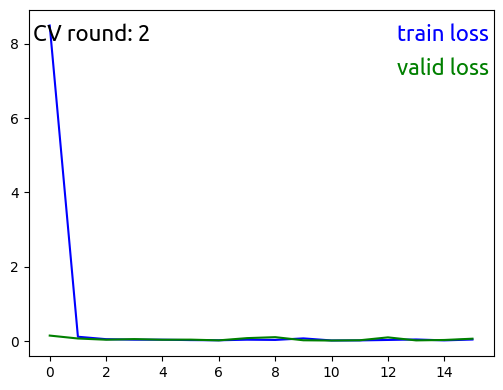

>round 3
EARLY STOPPING @ epoch 23
min train loss: 0.012697090371704299
min valid loss: 0.008715854931829704


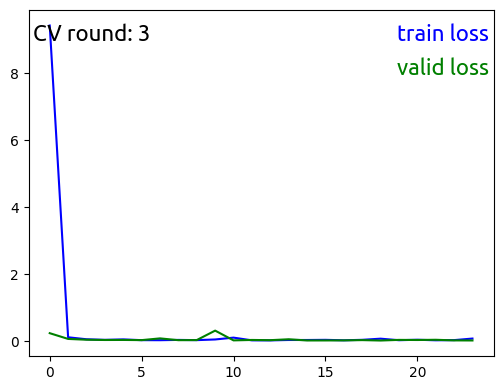

>round 4
EARLY STOPPING @ epoch 9
min train loss: 0.0208672847414066
min valid loss: 0.01884130569588807


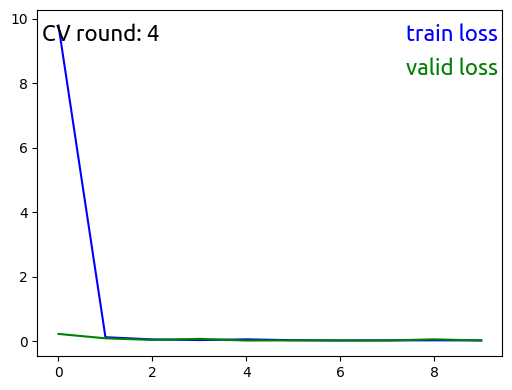

>round 5
EARLY STOPPING @ epoch 14
min train loss: 0.026740573323524194
min valid loss: 0.012624573479923937


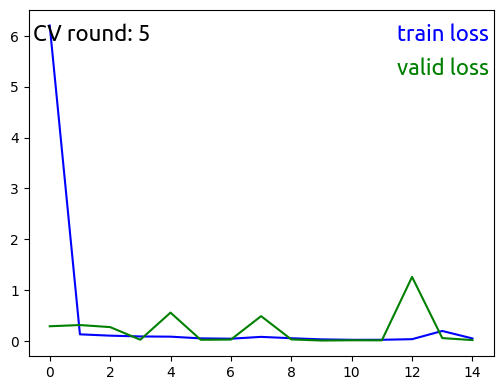

>round 6
EARLY STOPPING @ epoch 18
min train loss: 0.014450430862359271
min valid loss: 0.014613800268206332


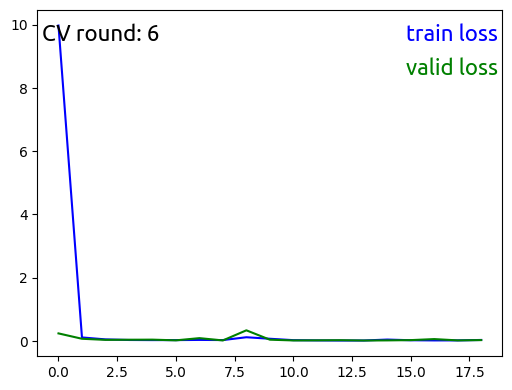

>round 7
EARLY STOPPING @ epoch 11
min train loss: 0.01351977239385986
min valid loss: 0.015357832165641917


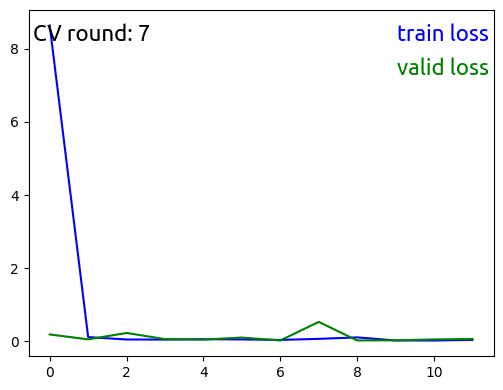

>round 8
EARLY STOPPING @ epoch 14
min train loss: 0.01447780901366029
min valid loss: 0.011757453800075583


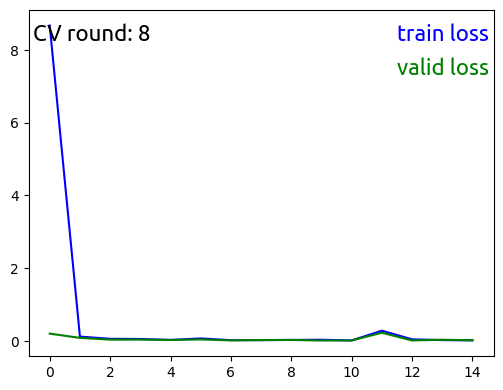

>round 9
EARLY STOPPING @ epoch 23
min train loss: 0.014751600744279702
min valid loss: 0.009456424249543084


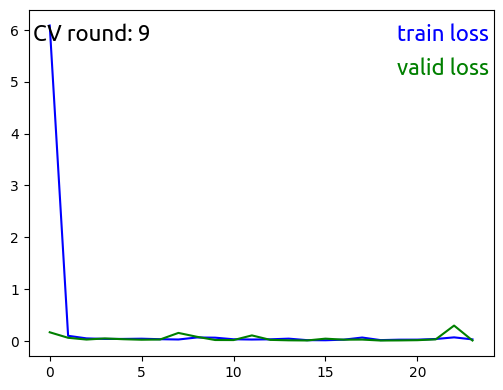

>round 10
EARLY STOPPING @ epoch 20
min train loss: 0.012431535592749099
min valid loss: 0.008807299348215262


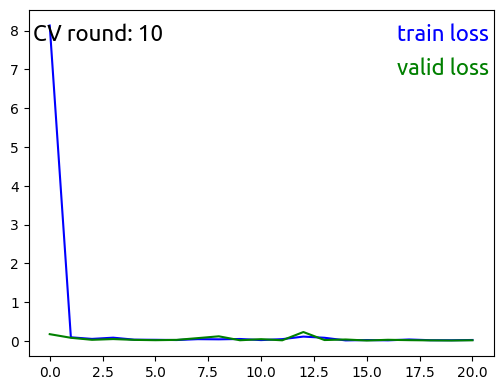

>round 11
EARLY STOPPING @ epoch 23
min train loss: 0.014407802369322412
min valid loss: 0.010061847304718362


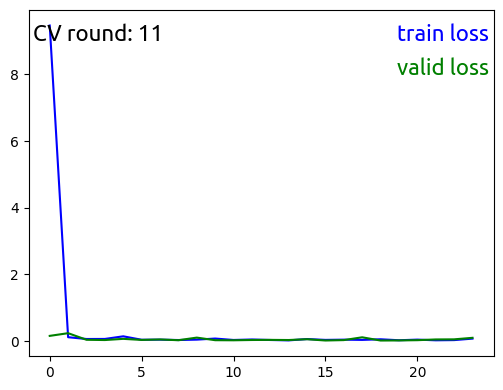

>round 12
EARLY STOPPING @ epoch 16
min train loss: 0.012772699005994176
min valid loss: 0.012905047326866124


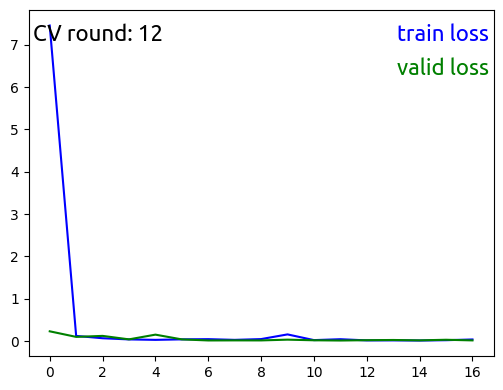

>round 13
EARLY STOPPING @ epoch 17
min train loss: 0.013213373520527004
min valid loss: 0.011064295450018512


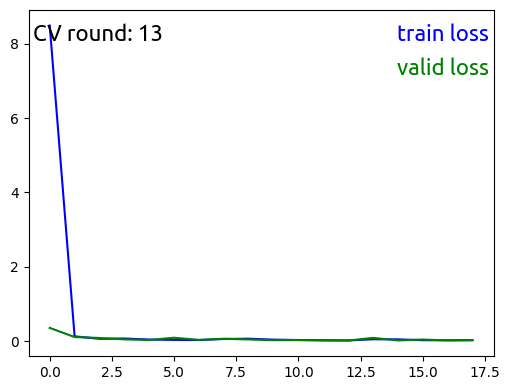

>round 14
EARLY STOPPING @ epoch 28
min train loss: 0.011940979837509226
min valid loss: 0.0073790148211022215


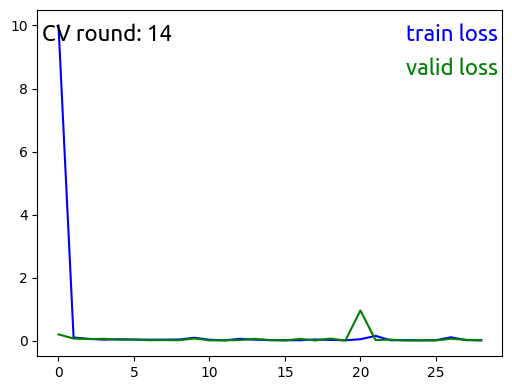

>round 15
EARLY STOPPING @ epoch 19
min train loss: 0.019674041543217485
min valid loss: 0.00922990577398903


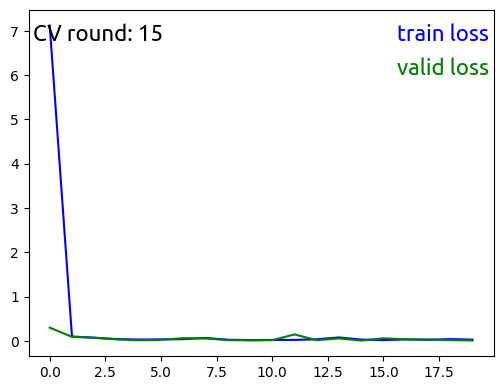

BEST model: CV=14.pth with 0.0073790148211022215
trained datas by weaving them
Aggregate performance: Valid loss mean 0.011667256224124381, std 0.002850982554487149
😇 TRAINing COMPLETE____________________________
TEST____________________________
Testing pressure_230516_discrete, loss:  0.006385909771779552
Testing temperature_230509_discrete, loss:  0.005116799294850544


In [3]:
from CrossValidation import CrossValidator
from tools import SaveBestCrossValidationModel
from Triplet_TCN import TripletAux_and_TCNDataset, TripletAux_and_TCNManager
from data import alternate_rows_itertools
s = {
    'problem'           : "regression",
    'approach'          : "metric learning/non-parametric",
    'algorithm'         : "triplet network",
    'input'             : "samples from a distribution",
    'input type'        : "vectors",
    'input meaning'     : "spectrum", 
    'input dimension'   : 10000,
    'input channels'    : 1,
    'output'            : "samples from a distribution",
    'output type'       : "one number",
    'output meaning'    : "temperature or pressure, depending on distribution",
    'output dimension'  : 1,
    'learning rate'     : 1e-4, # was 1e-4
    'feature dimension' : 300,
    'cross validation round': 16,
    'cross validation round-development' : 2,
    'epoch'             : 1000,
    'epoch-development' : 20,
    'batch size'        : 64,
    'number of convolution levels': 3,
    'best model folder' : 'triplet_best_model/'
}
datas.reverse()
CVtor = CrossValidator(saver=SaveBestCrossValidationModel(s['best model folder']), 
                       dataset=TripletAux_and_TCNDataset,
                       datas=datas,
                       data_dictionary=data_dictionary,
                       manager=TripletAux_and_TCNManager,
                       settings=s,
                       device=device,
                       dev=False)
# CVtor.single_task_train(1)
# CVtor.multi_task_train_sequential()
CVtor.multi_task_train_weave(alternate_rows_itertools) 
CVtor.complete_notify()
CVtor.test_all()